# Introduction

## Do higher film budgets lead to more box office revenue? Let's find out !



# Import Statements

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings


# Notebook Presentation

In [68]:
pd.options.display.float_format = '{:,.2f}'.format
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
warnings.filterwarnings('ignore')

# Read the Data

In [69]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

In [70]:
# How many rows and columns does the dataset contain?
print(f"dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

dataset contains 5391 rows and 6 columns


In [71]:
# Are there any NaN values present?
print(f"dataset contains {data.isna().sum().sum()} null values")

dataset contains 0 null values


In [72]:
# Are there any duplicate rows?
print(f"dataset contains {data.duplicated().sum()} duplicated values")

dataset contains 0 duplicated values


In [73]:
# What are the data types of the columns?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [74]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
405,4775,3/15/1985,Def-Con 4,"$1,300,000","$210,904","$210,904"
1725,3258,12/10/2001,Corky Romano,"$11,000,000","$25,116,103","$23,978,402"
307,2971,9/12/1981,Taps,"$14,000,000","$35,856,053","$35,856,053"
2459,3718,7/10/2005,"Good Night, and Good Luck","$7,000,000","$56,586,901","$31,501,218"
3974,1977,9/12/2011,New Year’s Eve,"$26,000,000","$146,850,273","$54,544,638"


### Data Type Conversions

In [75]:
# Convert the USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns to a numeric format by removing `$` signs and `,`. 
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$', "")
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace(',', "")
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)

In [76]:
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$', "")
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace(',', "")
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)

In [77]:
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$', "")
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace(',', "")
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)

In [78]:
# Convert the Release_Date column to a Pandas Datetime type.
data.Release_Date = pd.to_datetime(data.Release_Date)


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

In [80]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [81]:
# Describe the min max of USD budget for the movies domestic and worldwide gross
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [82]:
# Show the Top budget in the dataset 
data.sort_values(by=["USD_Production_Budget"],ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

In [83]:
# How many films grossed $0 domestically ? What were the highest budget films that grossed nothing?
grossed_zero = data[data.USD_Domestic_Gross==0]

In [84]:
print(f'Number of films that grossed $0 domestically {len(grossed_zero)}')

Number of films that grossed $0 domestically 512


In [85]:
highest_budget =  grossed_zero.sort_values(by=["USD_Production_Budget"],ascending=False)

In [86]:
highest_budget.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [87]:
grossed_zero_worldwide = data[data.USD_Worldwide_Gross==0]

In [88]:
highest_budget_worldwide =  grossed_zero_worldwide.sort_values(by=["USD_Production_Budget"],ascending=False)

In [89]:
highest_budget_worldwide.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


In [90]:
# It appears some movies didnt make it to the market when the dataset was created.

### Filtering on Multiple Conditions

In [91]:
# Find international releases
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]

In [92]:
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [93]:
# Find international releases using .query() function
second_int_releases = data.query('@data.USD_Domestic_Gross == 0 and @data.USD_Worldwide_Gross != 0')

In [94]:
second_int_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

In [95]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [96]:
# Identify which films were not released yet as of the time of data collection (May 1st, 2018).
clean_data = data.query('@data.Release_Date < @scrape_date')

In [97]:
clean_data.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000


### Films that Lost Money

In [98]:
# The percentage of films where the production costs exceeded the worldwide gross revenue
films_lost_money = clean_data.query("@data.USD_Production_Budget > @data.USD_Worldwide_Gross")

In [99]:
perc = len(films_lost_money) / len(clean_data) * 100
print("The percentage of film that lost money is: ")
print('{:.2f}'.format(perc))



The percentage of film that lost money is: 
37.28


# Seaborn for Data Viz: Bubble Charts

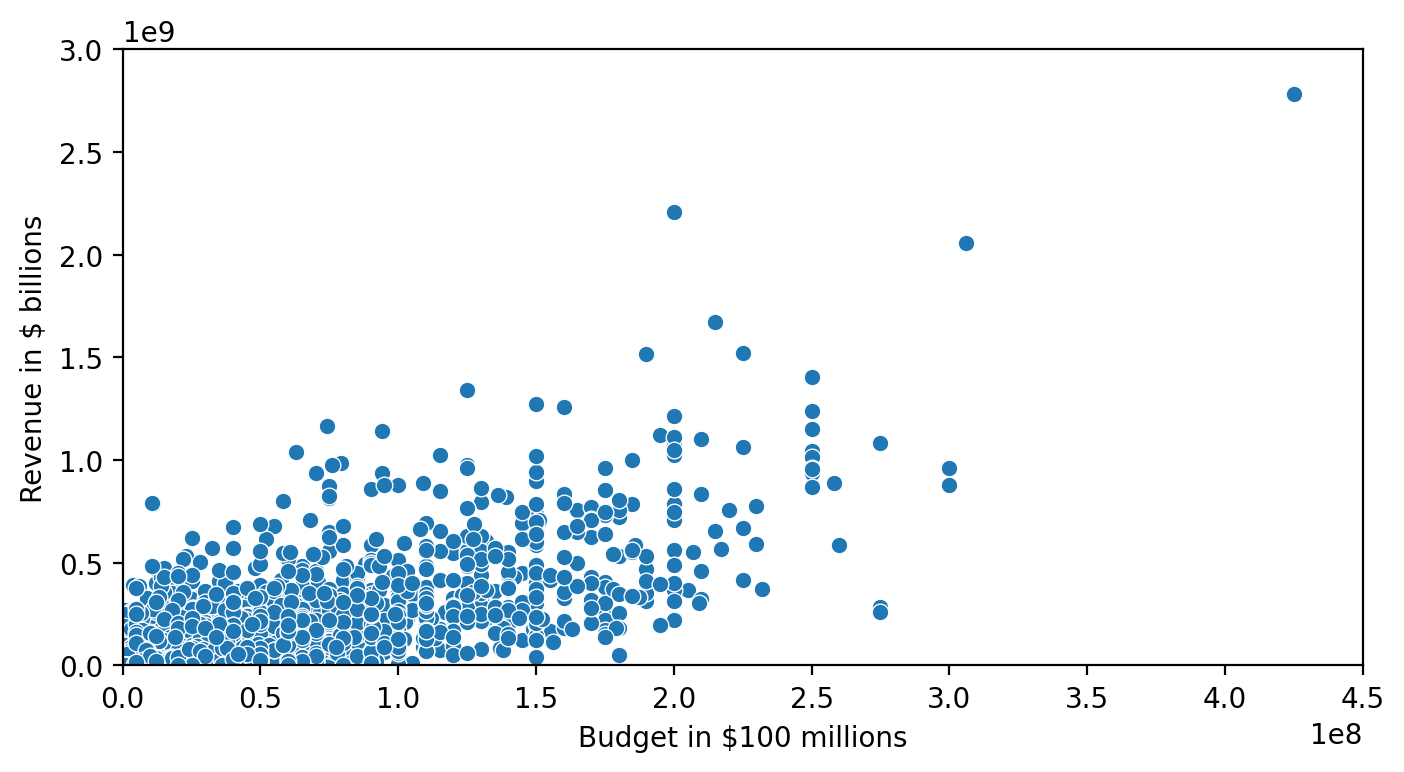

In [100]:
plt.figure(figsize=(8,4),dpi=200)

ax = sns.scatterplot(data=clean_data,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 

plt.show()

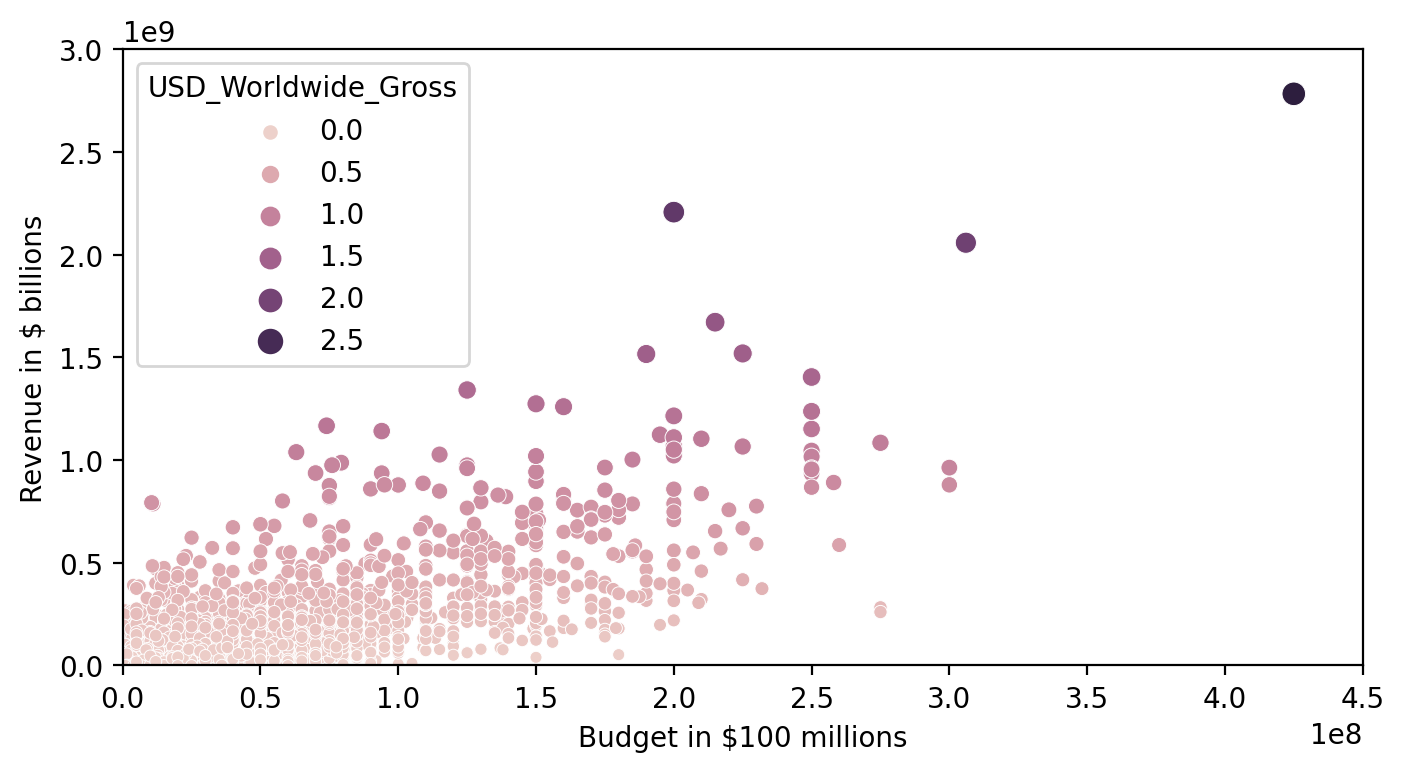

In [101]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=clean_data,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

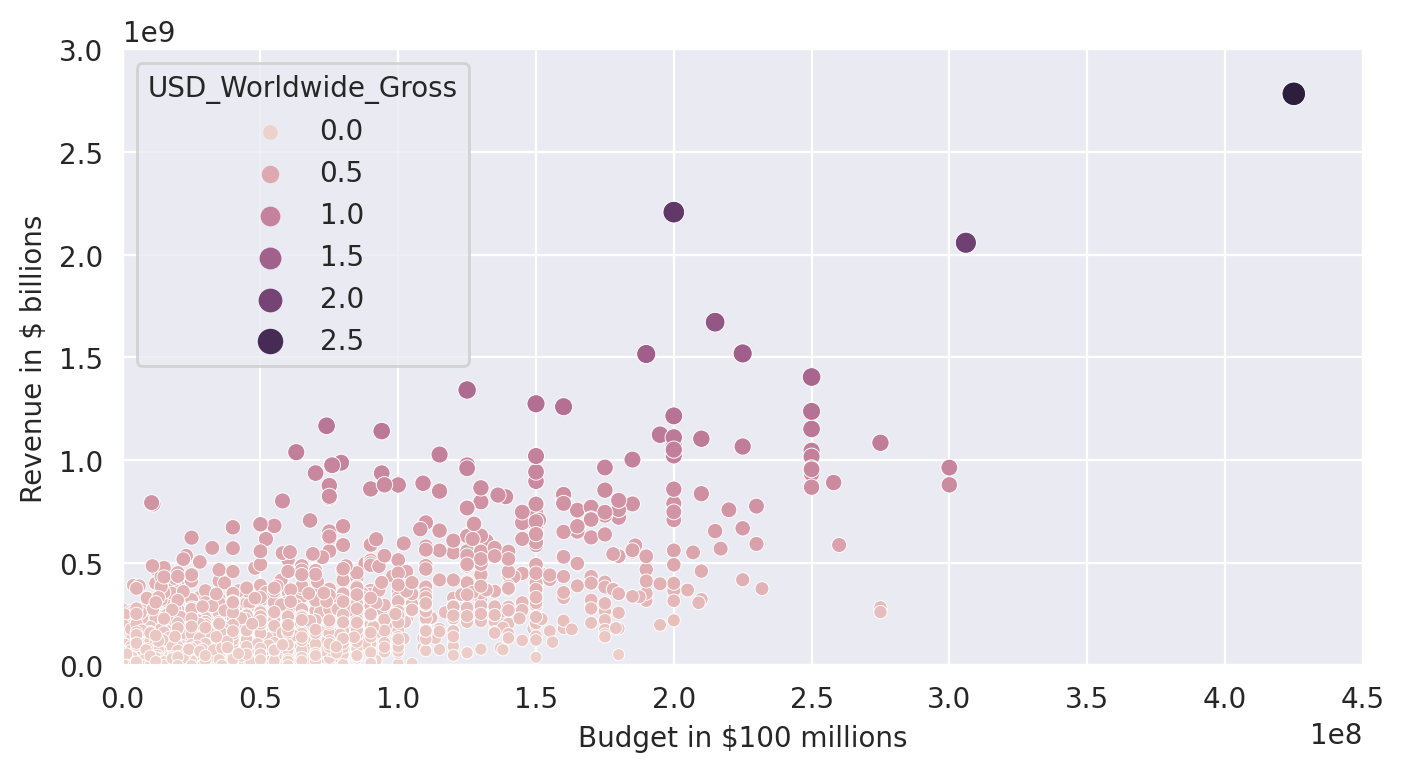

In [102]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=clean_data,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time


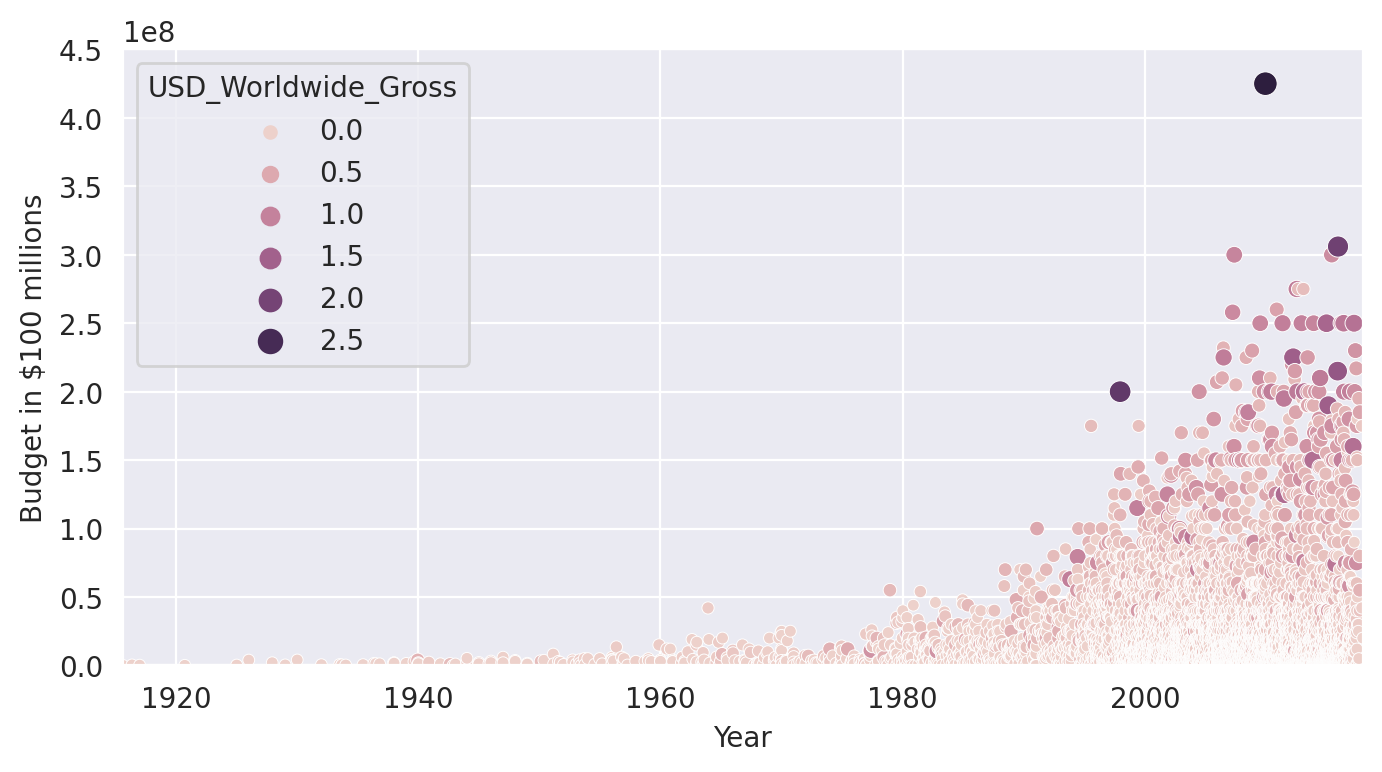

In [103]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=clean_data, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(clean_data.Release_Date.min(), clean_data.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

In [104]:
# We can see that the movie budget over the years has skyrocketed

# Converting Years to Decades Trick


In [105]:
# Create a column in `data_clean` that has the decade of the release
test_df = pd.DatetimeIndex(clean_data.Release_Date)

In [106]:
# Grab all the years from the `DatetimeIndex` object using the `.year` property
# Use floor division `//` to convert the year data to the decades of the films
(test_df.year // 10) * 10

Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5384)

In [107]:
# Add the decades as a `Decade` column to the `data_clean` DataFrame.
clean_data["Decade"]= (test_df.year // 10) * 10

### Separate the "old" (before 1969) and "New" (1970s onwards) Films


In [108]:
# Create two new DataFrames: `old_films` and `new_films`
# old_films include all the films before 1970
old_films = clean_data.query('@clean_data.Decade <= 1969')

In [109]:
#  How many films were released prior to 1970
len(old_films)

153

In [110]:
# new_films include all the films from 1970 onwards
new_films = clean_data.query('@clean_data.Decade > 1970')

In [111]:
#  How many films were released after 1960
len(new_films)

5122

In [112]:
#  What was the most expensive film made prior to 1970?!
old_films.sort_values(by=["USD_Production_Budget"],ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


In [113]:
# Cleopatra was made in 1963 and had a huge budget of $42.000.000 !

# Seaborn Regression Plots

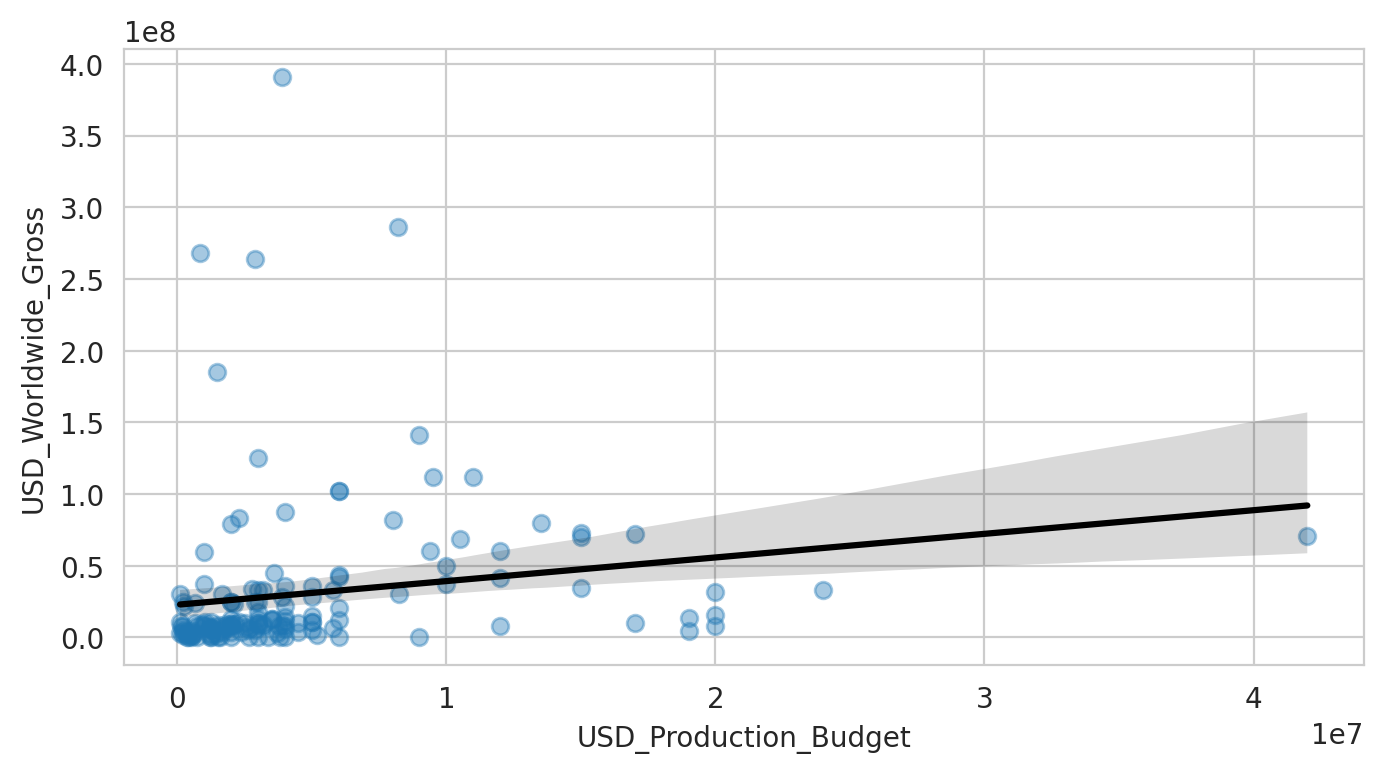

In [114]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

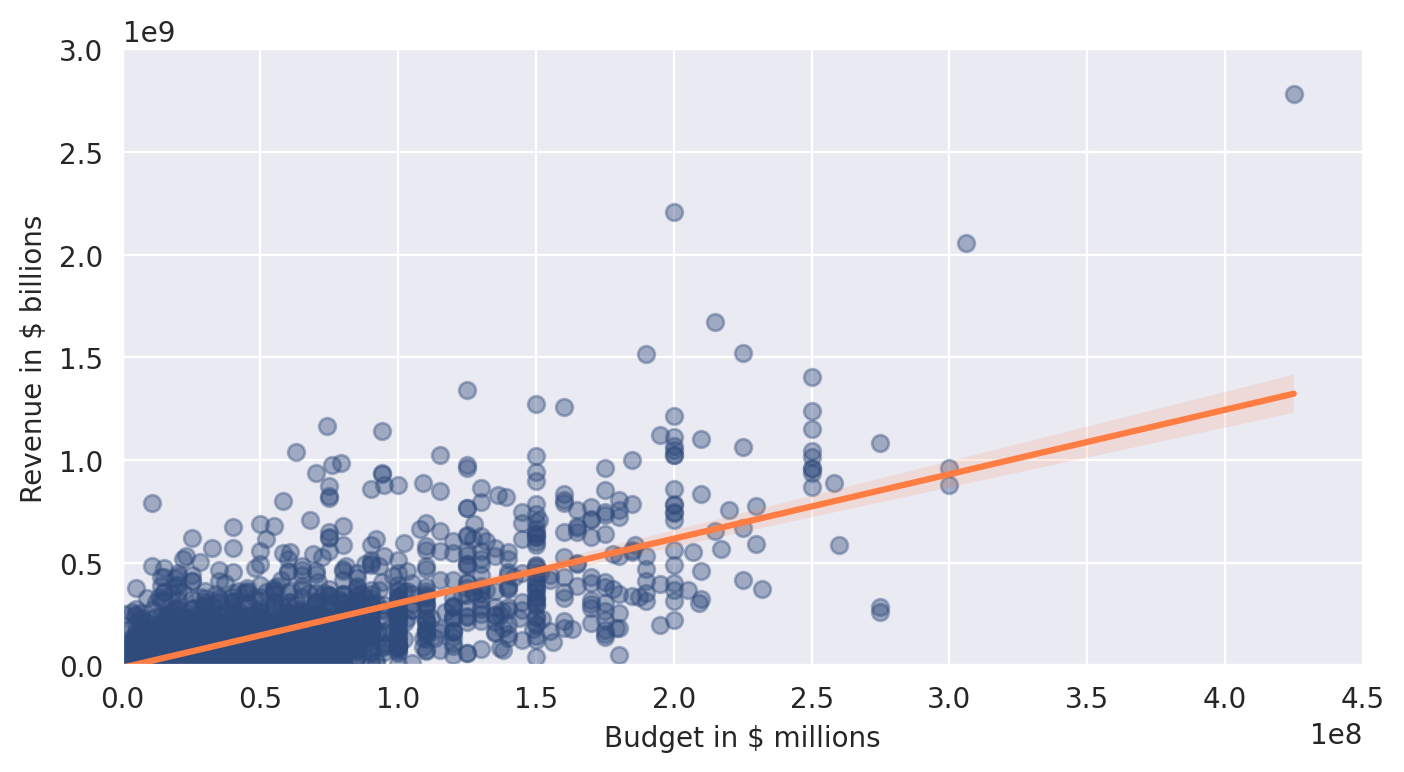

In [115]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
   ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4,'color': '#2f4b7c'},    
            line_kws = {'color': '#ff7c43'})

   ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           xlabel='Budget in $ millions',
           ylabel='Revenue in $ billions')

In [116]:
regression = LinearRegression()

In [117]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [118]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [119]:
# intercept represents the mean value of the response variable when all of the predictor variables in the model are equal to zero
# Fyi the gross of a movie if the budget is 0 
inter_new_movies = regression.intercept_
inter_new_movies

array([-10278584.79397975])

In [120]:
# 22 millions gross for 0 budget means its kinda profitable doing a movie but the model clearly doesnt understand how the world works :) 

In [121]:
# The slope is interpreted as the change of y for a one unit increase in x.
# Fyi for every 1 dollar the budget increases the profit increases by 3 dollars !
slope_new_movies = regression.coef_
slope_new_movies

array([[3.13834648]])

In [122]:
type(X)

pandas.core.frame.DataFrame

In [123]:
# R-squared (Συντελεστής προσδιορισμού)
r_squared_new_movies = regression.score(X, y)
r_squared_new_movies

0.564250171393927

In [124]:
# 55% r-squared indicates that 45% of the variability in the outcome data cannot be explained by the model

# Run  Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [125]:
# Run a linear regression for the `old_films'
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

In [126]:
regression.fit(X, y)

LinearRegression()

In [127]:
intercept = regression.intercept_
intercept

array([22821538.63508038])

In [128]:
# The slope is interpreted as the change of y for a one unit increase in x.
# Fyi for every 1 dollar the budget increases the profit increases by 1.6 dollars !
slope = regression.coef_
slope

array([[1.64771314]])

In [129]:
# R-squared (Συντελεστής προσδιορισμού)
r_squared = regression.score(X, y)
r_squared

0.02937258620576877

# Use the Model to Make a Prediction


$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$


In [130]:
# How much global revenue does our model estimate for a film with a budget of $350 million? 
revenue_old = 22821538+1.6*350000000
print(f"The estimated revenue for making a $350 million dollar movie is around {revenue_old} dollars")

The estimated revenue for making a $350 million dollar movie is around 582821538.0 dollars


## The estimated revenue for making a $350 million dollar movie is around 582821538.0 dollars

##### Dataset from https://www.the-numbers.com/movie/budgets on **May 1st, 2018**. 